In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
import os
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML
import face_recognition
from PIL import Image, ImageDraw
from tqdm import tqdm

In [2]:
train_sample_metadata = pd.read_json('./input/deepfake-detection-challenge/train_sample_videos/metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


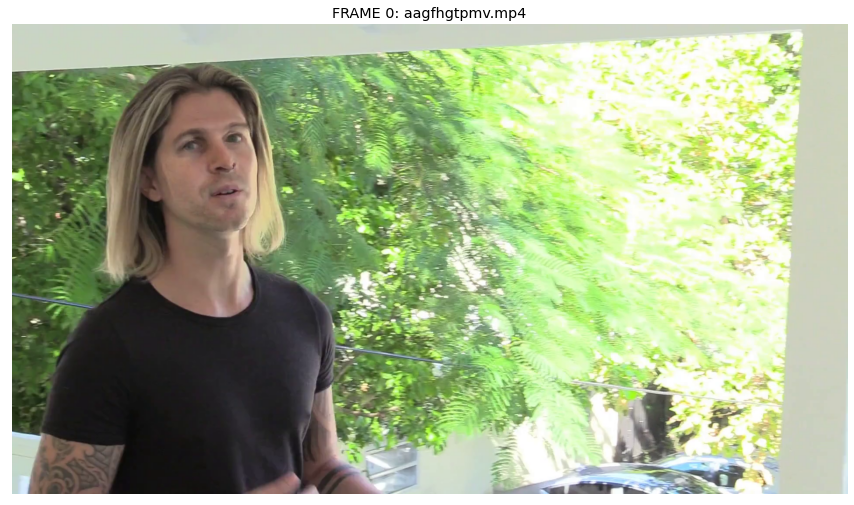

In [6]:
train_dir = './input/deepfake-detection-challenge/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[0]
# video_file = './input/train_sample_videos/akxoopqjqz.mp4'
cap = cv2.VideoCapture(video_file)
success, image = cap.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

A face is located at pixel location Top: 217, Left: 365, Bottom: 440, Right: 588


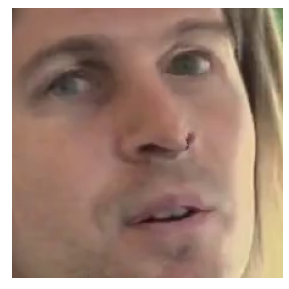

In [7]:
face_locations = face_recognition.face_locations(image)
if face_locations:
    for face_location in face_locations:

        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # You can access the actual face itself like this:
        face_image = image[top:bottom, left:right]
        fig, ax = plt.subplots(1,1, figsize=(5, 5))
        plt.grid(False)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(face_image)

The chin in this face has the following points: [(317, 321), (326, 354), (336, 386), (351, 415), (373, 439), (404, 456), (441, 467), (478, 470), (510, 466), (533, 453), (544, 432), (550, 405), (551, 377), (549, 350), (547, 324), (545, 299), (537, 274)]
The left_eyebrow in this face has the following points: [(365, 277), (380, 258), (402, 245), (428, 241), (452, 245)]
The right_eyebrow in this face has the following points: [(486, 241), (500, 231), (516, 227), (531, 230), (539, 242)]
The nose_bridge in this face has the following points: [(477, 267), (485, 283), (494, 298), (503, 315)]
The nose_tip in this face has the following points: [(473, 344), (487, 345), (500, 345), (508, 341), (514, 336)]
The left_eye in this face has the following points: [(394, 287), (408, 275), (424, 272), (438, 281), (425, 286), (409, 289)]
The right_eye in this face has the following points: [(491, 272), (503, 260), (517, 257), (527, 265), (520, 271), (506, 273)]
The top_lip in this face has the following p

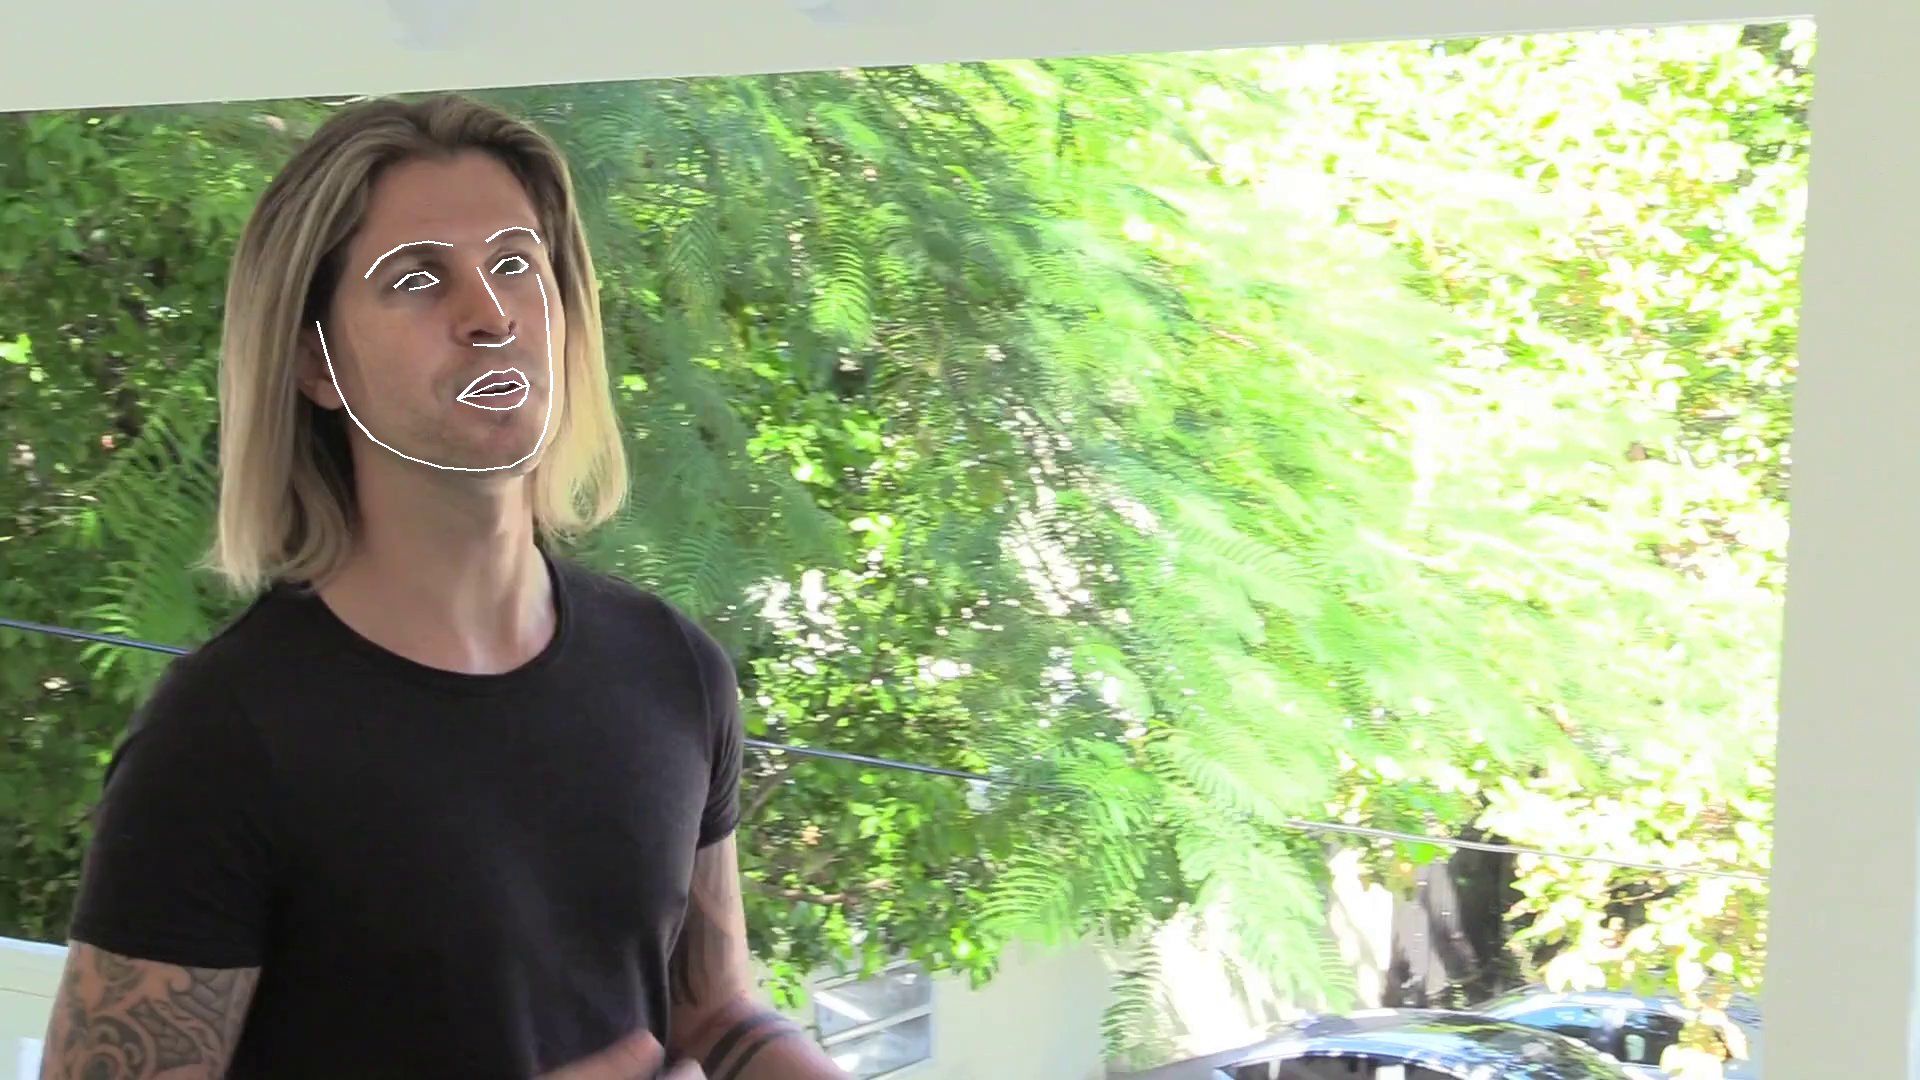

In [8]:
face_landmarks_list = face_recognition.face_landmarks(image)
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

if face_landmarks_list:
    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
        for facial_feature in face_landmarks.keys():
            print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=3)

    # Show the picture
    display(pil_image)

In [15]:
padding = 40
output_dir = './output/deepfake-detection-challenge/train_sample_videos/'

for fn in tqdm(train_sample_metadata.index[191:]):
    print(fn)
    output_fn_dir = output_dir+fn+'/'
    if not os.path.exists(output_fn_dir):
        os.mkdir(output_fn_dir)
    video_file = train_dir+fn
    cap = cv2.VideoCapture(video_file)
    for i in range(300):
        ret, frame = cap.read()
        if not ret:
            break
        elif (i%10==0):
            face_locations = face_recognition.face_locations(frame)
            if not face_locations:
                continue
            top, right, bottom, left = face_locations[0]
            frame = frame[top-padding:bottom+padding, left-padding:right+padding]
            if frame.any():
                cv2.imwrite(output_fn_dir+str(i)+'.jpg', frame)
    cap.release()

  0%|                                                                                          | 0/209 [00:00<?, ?it/s]

cferslmfwh.mp4


  0%|▍                                                                               | 1/209 [00:38<2:14:53, 38.91s/it]

cffffbcywc.mp4


  1%|▊                                                                               | 2/209 [01:17<2:14:28, 38.98s/it]

cfxkpiweqt.mp4


  1%|█▏                                                                              | 3/209 [01:57<2:14:32, 39.19s/it]

cfyduhpbps.mp4


  2%|█▌                                                                              | 4/209 [02:36<2:14:07, 39.26s/it]

cglxirfaey.mp4


  2%|█▉                                                                              | 5/209 [03:15<2:13:16, 39.20s/it]

cgvrgibpfo.mp4


  3%|██▎                                                                             | 6/209 [03:54<2:12:26, 39.15s/it]

chtapglbcj.mp4


  3%|██▋                                                                             | 7/209 [04:34<2:12:10, 39.26s/it]

chviwxsfhg.mp4


  4%|███                                                                             | 8/209 [05:14<2:12:11, 39.46s/it]

chzieimrwu.mp4


  4%|███▍                                                                            | 9/209 [05:55<2:13:19, 40.00s/it]

ciyoudyhly.mp4


  5%|███▊                                                                           | 10/209 [06:35<2:13:02, 40.11s/it]

cizlkenljw.mp4


  5%|████▏                                                                          | 11/209 [07:18<2:15:16, 40.99s/it]

ckbdwedgmc.mp4


  6%|████▌                                                                          | 12/209 [08:00<2:14:58, 41.11s/it]

ckjaibzfxa.mp4


  6%|████▉                                                                          | 13/209 [08:40<2:13:20, 40.82s/it]

ckkuyewywx.mp4


  7%|█████▎                                                                         | 14/209 [09:20<2:12:26, 40.75s/it]

cknyxaqouy.mp4


  7%|█████▋                                                                         | 15/209 [10:01<2:11:15, 40.60s/it]

cksanfsjhc.mp4


  8%|██████                                                                         | 16/209 [10:41<2:10:14, 40.49s/it]

clihsshdkq.mp4


  8%|██████▍                                                                        | 17/209 [11:21<2:09:22, 40.43s/it]

clrycekyst.mp4


  9%|██████▊                                                                        | 18/209 [12:01<2:08:29, 40.36s/it]

cmbzllswnl.mp4


  9%|███████▏                                                                       | 19/209 [12:41<2:07:22, 40.22s/it]

cmxcfkrjiv.mp4


 10%|███████▌                                                                       | 20/209 [13:21<2:06:19, 40.10s/it]

cnilkgvfei.mp4


 10%|███████▉                                                                       | 21/209 [14:01<2:05:21, 40.01s/it]

coadfnerlk.mp4


 11%|████████▎                                                                      | 22/209 [14:41<2:04:29, 39.95s/it]

cobjrlugvp.mp4


 11%|████████▋                                                                      | 23/209 [15:21<2:03:45, 39.92s/it]

covdcysmbi.mp4


 11%|█████████                                                                      | 24/209 [16:01<2:03:11, 39.96s/it]

cpjxareypw.mp4


 12%|█████████▍                                                                     | 25/209 [16:41<2:02:33, 39.97s/it]

cppdvdejkc.mp4


 12%|█████████▊                                                                     | 26/209 [17:21<2:01:55, 39.97s/it]

cprhtltsjp.mp4


 13%|██████████▏                                                                    | 27/209 [18:00<2:01:11, 39.96s/it]

cqfugiqupm.mp4


 13%|██████████▌                                                                    | 28/209 [18:40<2:00:23, 39.91s/it]

cqhngvpgyi.mp4


 14%|██████████▉                                                                    | 29/209 [19:20<1:59:43, 39.91s/it]

cqrskwiqng.mp4


 14%|███████████▎                                                                   | 30/209 [20:00<1:58:55, 39.86s/it]

crezycjqyk.mp4


 15%|███████████▋                                                                   | 31/209 [20:40<1:58:18, 39.88s/it]

crktehraph.mp4


 15%|████████████                                                                   | 32/209 [21:20<1:57:39, 39.88s/it]

crzfebnfgb.mp4


 16%|████████████▍                                                                  | 33/209 [22:00<1:56:51, 39.84s/it]

cthdnahrkh.mp4


 16%|████████████▊                                                                  | 34/209 [22:40<1:56:23, 39.90s/it]

ctpqeykqdp.mp4


 17%|█████████████▏                                                                 | 35/209 [23:19<1:55:11, 39.72s/it]

cttqtsjvgn.mp4


 17%|█████████████▌                                                                 | 36/209 [23:58<1:54:12, 39.61s/it]

ctzmavwror.mp4


 18%|█████████████▉                                                                 | 37/209 [24:37<1:53:04, 39.45s/it]

curpwogllm.mp4


 18%|██████████████▎                                                                | 38/209 [25:17<1:52:24, 39.44s/it]

cuzrgrbvil.mp4


 19%|██████████████▋                                                                | 39/209 [25:56<1:51:30, 39.35s/it]

cvaksbpssm.mp4


 19%|███████████████                                                                | 40/209 [26:35<1:50:42, 39.31s/it]

cwbacdwrzo.mp4


 20%|███████████████▍                                                               | 41/209 [27:14<1:49:57, 39.27s/it]

cwqlvzefpg.mp4


 20%|███████████████▉                                                               | 42/209 [27:53<1:49:09, 39.22s/it]

cwrtyzndpx.mp4


 21%|████████████████▎                                                              | 43/209 [28:33<1:48:29, 39.21s/it]

cwsbspfzck.mp4


 21%|████████████████▋                                                              | 44/209 [29:12<1:48:11, 39.34s/it]

cwwandrkus.mp4


 22%|█████████████████                                                              | 45/209 [29:52<1:47:43, 39.41s/it]

cxfujlvsuw.mp4


 22%|█████████████████▍                                                             | 46/209 [30:31<1:46:53, 39.35s/it]

cxrfacemmq.mp4


 22%|█████████████████▊                                                             | 47/209 [31:10<1:46:13, 39.34s/it]

cxttmymlbn.mp4


 23%|██████████████████▏                                                            | 48/209 [31:50<1:45:33, 39.34s/it]

cyboodqqyr.mp4


 23%|██████████████████▌                                                            | 49/209 [32:29<1:44:38, 39.24s/it]

cycacemkmt.mp4


 24%|██████████████████▉                                                            | 50/209 [33:08<1:43:52, 39.20s/it]

cyclgfjdrv.mp4


 24%|███████████████████▎                                                           | 51/209 [33:47<1:43:32, 39.32s/it]

cyxlcuyznd.mp4


 25%|███████████████████▋                                                           | 52/209 [34:26<1:42:07, 39.03s/it]

czfunozvwp.mp4


 25%|████████████████████                                                           | 53/209 [35:04<1:41:03, 38.87s/it]

czkdanyadc.mp4


 26%|████████████████████▍                                                          | 54/209 [35:43<1:40:08, 38.76s/it]

czmqpxrqoh.mp4


 26%|████████████████████▊                                                          | 55/209 [36:21<1:39:13, 38.66s/it]

dafhtipaml.mp4


 27%|█████████████████████▏                                                         | 56/209 [36:59<1:38:23, 38.58s/it]

dakiztgtnw.mp4


 27%|█████████████████████▌                                                         | 57/209 [37:38<1:37:41, 38.57s/it]

dakqwktlbi.mp4


 28%|█████████████████████▉                                                         | 58/209 [38:16<1:36:49, 38.47s/it]

dbhoxkblzx.mp4


 28%|██████████████████████▎                                                        | 59/209 [38:55<1:36:14, 38.50s/it]

dbhrpizyeq.mp4


 29%|██████████████████████▋                                                        | 60/209 [39:33<1:35:40, 38.53s/it]

dbnygxtwek.mp4


 29%|███████████████████████                                                        | 61/209 [40:12<1:34:53, 38.47s/it]

dboxtiehng.mp4


 30%|███████████████████████▍                                                       | 62/209 [40:50<1:34:11, 38.44s/it]

dbtbbhakdv.mp4


 30%|███████████████████████▊                                                       | 63/209 [41:29<1:33:36, 38.47s/it]

dbzcqmxzaj.mp4


 31%|████████████████████████▏                                                      | 64/209 [42:07<1:32:52, 38.43s/it]

dbzpcjntve.mp4


 31%|████████████████████████▌                                                      | 65/209 [42:46<1:32:17, 38.45s/it]

dcamvmuors.mp4


 32%|████████████████████████▉                                                      | 66/209 [43:24<1:31:40, 38.46s/it]

dcuiiorugd.mp4


 32%|█████████████████████████▎                                                     | 67/209 [44:02<1:30:54, 38.41s/it]

ddepeddixj.mp4


 33%|█████████████████████████▋                                                     | 68/209 [44:41<1:30:25, 38.48s/it]

ddhfabwpuz.mp4


 33%|██████████████████████████                                                     | 69/209 [45:20<1:29:52, 38.51s/it]

ddjggcasdw.mp4


 33%|██████████████████████████▍                                                    | 70/209 [45:58<1:29:12, 38.51s/it]

ddpvuimigj.mp4


 34%|██████████████████████████▊                                                    | 71/209 [46:36<1:28:31, 38.49s/it]

ddqccgmtka.mp4


 34%|███████████████████████████▏                                                   | 72/209 [47:15<1:27:55, 38.51s/it]

degpbqvcay.mp4


 35%|███████████████████████████▌                                                   | 73/209 [47:54<1:27:17, 38.51s/it]

deywhkarol.mp4


 35%|███████████████████████████▉                                                   | 74/209 [48:32<1:26:40, 38.52s/it]

deyyistcrd.mp4


 36%|████████████████████████████▎                                                  | 75/209 [49:11<1:26:10, 38.59s/it]

dfbpceeaox.mp4


 36%|████████████████████████████▋                                                  | 76/209 [49:49<1:25:26, 38.55s/it]

dgmevclvzy.mp4


 37%|█████████████████████████████                                                  | 77/209 [50:28<1:24:51, 38.58s/it]

dgxrqjdomn.mp4


 37%|█████████████████████████████▍                                                 | 78/209 [51:07<1:24:15, 38.59s/it]

dgzklxjmix.mp4


 38%|█████████████████████████████▊                                                 | 79/209 [51:45<1:23:45, 38.66s/it]

dhcndnuwta.mp4


 38%|██████████████████████████████▏                                                | 80/209 [52:24<1:23:07, 38.66s/it]

dhcselezer.mp4


 39%|██████████████████████████████▌                                                | 81/209 [53:03<1:22:33, 38.70s/it]

dhevettufk.mp4


 39%|██████████████████████████████▉                                                | 82/209 [53:42<1:21:54, 38.70s/it]

dhjmzhrcav.mp4


 40%|███████████████████████████████▎                                               | 83/209 [54:20<1:21:04, 38.61s/it]

dhkwmjxwrn.mp4


 40%|███████████████████████████████▊                                               | 84/209 [54:58<1:20:25, 38.60s/it]

dhoqofwoxa.mp4


 41%|████████████████████████████████▏                                              | 85/209 [55:37<1:19:41, 38.56s/it]

dhxctgyoqj.mp4


 41%|████████████████████████████████▌                                              | 86/209 [56:16<1:19:03, 38.56s/it]

diomeixhrg.mp4


 42%|████████████████████████████████▉                                              | 87/209 [56:54<1:18:31, 38.62s/it]

diopzaywor.mp4


 42%|█████████████████████████████████▎                                             | 88/209 [57:33<1:17:53, 38.62s/it]

diqraixiov.mp4


 43%|█████████████████████████████████▋                                             | 89/209 [58:11<1:17:13, 38.61s/it]

diuzrpqjli.mp4


 43%|██████████████████████████████████                                             | 90/209 [58:50<1:16:41, 38.67s/it]

djvtbgwdcc.mp4


 44%|██████████████████████████████████▍                                            | 91/209 [59:29<1:16:10, 38.73s/it]

djvutyvaio.mp4


 44%|█████████████████████████████████▉                                           | 92/209 [1:00:08<1:15:22, 38.65s/it]

djxdyjopjd.mp4


 44%|██████████████████████████████████▎                                          | 93/209 [1:00:46<1:14:36, 38.59s/it]

dkdwxmtpuo.mp4


 45%|██████████████████████████████████▋                                          | 94/209 [1:01:25<1:13:56, 38.58s/it]

dkhlttuvmx.mp4


 45%|███████████████████████████████████                                          | 95/209 [1:02:03<1:13:08, 38.50s/it]

dkrvorliqc.mp4


 46%|███████████████████████████████████▎                                         | 96/209 [1:02:42<1:12:37, 38.56s/it]

dkuayagnmc.mp4


 46%|███████████████████████████████████▋                                         | 97/209 [1:03:21<1:12:09, 38.65s/it]

dkwjwbwgey.mp4


 47%|████████████████████████████████████                                         | 98/209 [1:03:59<1:11:23, 38.59s/it]

dkzvdrzcnr.mp4


 47%|████████████████████████████████████▍                                        | 99/209 [1:04:38<1:10:53, 38.66s/it]

dlpoieqvfb.mp4


 48%|████████████████████████████████████▎                                       | 100/209 [1:05:16<1:10:09, 38.62s/it]

dlrsbscitn.mp4


 48%|████████████████████████████████████▋                                       | 101/209 [1:05:55<1:09:32, 38.63s/it]

dnexlwbcxq.mp4


 49%|█████████████████████████████████████                                       | 102/209 [1:06:34<1:08:52, 38.63s/it]

dnhvalzvrt.mp4


 49%|█████████████████████████████████████▍                                      | 103/209 [1:07:12<1:08:12, 38.61s/it]

dntkzzzcdh.mp4


 50%|█████████████████████████████████████▊                                      | 104/209 [1:07:51<1:07:28, 38.56s/it]

dnyvfblxpm.mp4


 50%|██████████████████████████████████████▏                                     | 105/209 [1:08:29<1:06:43, 38.50s/it]

doanjploai.mp4


 51%|██████████████████████████████████████▌                                     | 106/209 [1:09:08<1:06:06, 38.51s/it]

dofusvhnib.mp4


 51%|██████████████████████████████████████▉                                     | 107/209 [1:09:46<1:05:24, 38.47s/it]

dozyddhild.mp4


 52%|███████████████████████████████████████▎                                    | 108/209 [1:10:25<1:04:50, 38.52s/it]

dptbnjnkdg.mp4


 52%|███████████████████████████████████████▋                                    | 109/209 [1:11:03<1:04:11, 38.52s/it]

dptrzdvwpg.mp4


 53%|████████████████████████████████████████                                    | 110/209 [1:11:41<1:03:29, 38.48s/it]

dqnyszdong.mp4


 53%|████████████████████████████████████████▎                                   | 111/209 [1:12:20<1:02:45, 38.42s/it]

dqppxmoqdl.mp4


 54%|████████████████████████████████████████▋                                   | 112/209 [1:12:58<1:02:09, 38.44s/it]

dqqtjcryjv.mp4


 54%|█████████████████████████████████████████                                   | 113/209 [1:13:37<1:01:31, 38.45s/it]

dqswpjoepo.mp4


 55%|█████████████████████████████████████████▍                                  | 114/209 [1:14:15<1:00:53, 38.46s/it]

dqzreruvje.mp4


 55%|█████████████████████████████████████████▊                                  | 115/209 [1:14:54<1:00:20, 38.52s/it]

drcyabprvt.mp4


 56%|███████████████████████████████████████████▎                                  | 116/209 [1:15:33<59:52, 38.63s/it]

drgjzlxzxj.mp4


 56%|███████████████████████████████████████████▋                                  | 117/209 [1:16:11<59:12, 38.61s/it]

drsakwyvqv.mp4


 56%|████████████████████████████████████████████                                  | 118/209 [1:16:50<58:31, 38.59s/it]

drtbksnpol.mp4


 57%|████████████████████████████████████████████▍                                 | 119/209 [1:17:28<57:49, 38.55s/it]

dsdoseflas.mp4


 57%|████████████████████████████████████████████▊                                 | 120/209 [1:18:07<57:08, 38.53s/it]

dsgpbgsrdm.mp4


 58%|█████████████████████████████████████████████▏                                | 121/209 [1:18:45<56:28, 38.50s/it]

dsjbknkujw.mp4


 58%|█████████████████████████████████████████████▌                                | 122/209 [1:19:24<55:53, 38.54s/it]

dsndhujjjb.mp4


 59%|█████████████████████████████████████████████▉                                | 123/209 [1:20:03<55:18, 38.59s/it]

dtbpmdqvao.mp4


 59%|██████████████████████████████████████████████▎                               | 124/209 [1:20:41<54:35, 38.54s/it]

dtocdfbwca.mp4


 60%|██████████████████████████████████████████████▋                               | 125/209 [1:21:19<53:56, 38.53s/it]

dubiroskqn.mp4


 60%|███████████████████████████████████████████████                               | 126/209 [1:21:58<53:17, 38.53s/it]

dulanfulol.mp4


 61%|███████████████████████████████████████████████▍                              | 127/209 [1:22:37<52:43, 38.57s/it]

duvyaxbzvp.mp4


 61%|███████████████████████████████████████████████▊                              | 128/209 [1:23:16<52:11, 38.66s/it]

duycddgtrl.mp4


 62%|████████████████████████████████████████████████▏                             | 129/209 [1:23:54<51:30, 38.63s/it]

duzuusuajr.mp4


 62%|████████████████████████████████████████████████▌                             | 130/209 [1:24:33<50:49, 38.60s/it]

dvakowbgbt.mp4


 63%|████████████████████████████████████████████████▉                             | 131/209 [1:25:11<50:12, 38.62s/it]

dvumqqhoac.mp4


 63%|█████████████████████████████████████████████████▎                            | 132/209 [1:25:50<49:28, 38.55s/it]

dwediigjit.mp4


 64%|█████████████████████████████████████████████████▋                            | 133/209 [1:26:28<48:50, 38.56s/it]

dxbqjxrhin.mp4


 64%|██████████████████████████████████████████████████                            | 134/209 [1:27:07<48:14, 38.60s/it]

dxuliowugt.mp4


 65%|██████████████████████████████████████████████████▍                           | 135/209 [1:27:46<47:38, 38.62s/it]

dxuplhwvig.mp4


 65%|██████████████████████████████████████████████████▊                           | 136/209 [1:28:24<46:59, 38.62s/it]

dzieklokdr.mp4


 66%|███████████████████████████████████████████████████▏                          | 137/209 [1:29:03<46:24, 38.67s/it]

dzqwgqewhu.mp4


 66%|███████████████████████████████████████████████████▌                          | 138/209 [1:29:42<45:42, 38.63s/it]

dzvyfiarrq.mp4


 67%|███████████████████████████████████████████████████▉                          | 139/209 [1:30:20<45:05, 38.65s/it]

dzwkmcwkwl.mp4


 67%|████████████████████████████████████████████████████▏                         | 140/209 [1:30:59<44:26, 38.64s/it]

dzyuwjkjui.mp4


 67%|████████████████████████████████████████████████████▌                         | 141/209 [1:31:37<43:43, 38.59s/it]

eahlqmfvtj.mp4


 68%|████████████████████████████████████████████████████▉                         | 142/209 [1:32:16<43:05, 38.59s/it]

eajlrktemq.mp4


 68%|█████████████████████████████████████████████████████▎                        | 143/209 [1:32:55<42:31, 38.66s/it]

ebchwmwayp.mp4


 69%|█████████████████████████████████████████████████████▋                        | 144/209 [1:33:33<41:49, 38.61s/it]

ebebgmtlcu.mp4


 69%|██████████████████████████████████████████████████████                        | 145/209 [1:34:12<41:08, 38.57s/it]

ebeknhudxq.mp4


 70%|██████████████████████████████████████████████████████▍                       | 146/209 [1:34:52<41:01, 39.07s/it]

ebkzwjgjhq.mp4


 70%|██████████████████████████████████████████████████████▊                       | 147/209 [1:35:32<40:38, 39.33s/it]

ebywfrmhtd.mp4


 71%|███████████████████████████████████████████████████████▏                      | 148/209 [1:36:11<39:45, 39.11s/it]

eckvhdusax.mp4


 71%|███████████████████████████████████████████████████████▌                      | 149/209 [1:36:49<38:56, 38.94s/it]

ecnihjlfyt.mp4


 72%|███████████████████████████████████████████████████████▉                      | 150/209 [1:37:28<38:12, 38.86s/it]

ecujsjhscd.mp4


 72%|████████████████████████████████████████████████████████▎                     | 151/209 [1:38:06<37:28, 38.77s/it]

ecuvtoltue.mp4


 73%|████████████████████████████████████████████████████████▋                     | 152/209 [1:38:45<36:48, 38.75s/it]

ecwaxgutkc.mp4


 73%|█████████████████████████████████████████████████████████                     | 153/209 [1:39:24<36:06, 38.69s/it]

eczrseixwq.mp4


 74%|█████████████████████████████████████████████████████████▍                    | 154/209 [1:40:02<35:27, 38.67s/it]

edyncaijwx.mp4


 74%|█████████████████████████████████████████████████████████▊                    | 155/209 [1:40:41<34:45, 38.61s/it]

eebrkicpry.mp4


 75%|██████████████████████████████████████████████████████████▏                   | 156/209 [1:41:19<34:05, 38.59s/it]

eebserckhh.mp4


 75%|██████████████████████████████████████████████████████████▌                   | 157/209 [1:41:58<33:25, 38.56s/it]

eejswgycjc.mp4


 76%|██████████████████████████████████████████████████████████▉                   | 158/209 [1:42:36<32:46, 38.56s/it]

eekozbeafq.mp4


 76%|███████████████████████████████████████████████████████████▎                  | 159/209 [1:43:17<32:37, 39.16s/it]

eepezmygaq.mp4


 77%|███████████████████████████████████████████████████████████▋                  | 160/209 [1:43:58<32:23, 39.67s/it]

eeyhxisdfh.mp4


 77%|████████████████████████████████████████████████████████████                  | 161/209 [1:44:38<32:00, 40.01s/it]

efdyrflcpg.mp4


 78%|████████████████████████████████████████████████████████████▍                 | 162/209 [1:45:19<31:31, 40.25s/it]

efwfxwwlbw.mp4


 78%|████████████████████████████████████████████████████████████▊                 | 163/209 [1:46:00<31:00, 40.44s/it]

egbbcxcuqy.mp4


 78%|█████████████████████████████████████████████████████████████▏                | 164/209 [1:46:41<30:25, 40.57s/it]

eggbjzxnmg.mp4


 79%|█████████████████████████████████████████████████████████████▌                | 165/209 [1:47:20<29:28, 40.20s/it]

egghxjjmfg.mp4


 79%|█████████████████████████████████████████████████████████████▉                | 166/209 [1:47:59<28:27, 39.71s/it]

ehbnclaukr.mp4


 80%|██████████████████████████████████████████████████████████████▎               | 167/209 [1:48:37<27:32, 39.35s/it]

ehccixxzoe.mp4


 80%|██████████████████████████████████████████████████████████████▋               | 168/209 [1:49:16<26:42, 39.09s/it]

ehdkmxgtxh.mp4


 81%|███████████████████████████████████████████████████████████████               | 169/209 [1:49:54<25:57, 38.94s/it]

ehevsxtecd.mp4


 81%|███████████████████████████████████████████████████████████████▍              | 170/209 [1:50:33<25:13, 38.81s/it]

ehfiekigla.mp4


 82%|███████████████████████████████████████████████████████████████▊              | 171/209 [1:51:12<24:33, 38.77s/it]

ehieahnhte.mp4


 82%|████████████████████████████████████████████████████████████████▏             | 172/209 [1:51:50<23:51, 38.69s/it]

ehtdtkmmli.mp4


 83%|████████████████████████████████████████████████████████████████▌             | 173/209 [1:52:29<23:12, 38.67s/it]

eiriyukqqy.mp4


 83%|████████████████████████████████████████████████████████████████▉             | 174/209 [1:53:07<22:32, 38.64s/it]

eivxffliio.mp4


 84%|█████████████████████████████████████████████████████████████████▎            | 175/209 [1:53:46<21:53, 38.63s/it]

eiwopxzjfn.mp4


 84%|█████████████████████████████████████████████████████████████████▋            | 176/209 [1:54:24<21:13, 38.58s/it]

eixwxvxbbn.mp4


 85%|██████████████████████████████████████████████████████████████████            | 177/209 [1:55:03<20:35, 38.62s/it]

ejkqesyvam.mp4


 85%|██████████████████████████████████████████████████████████████████▍           | 178/209 [1:55:42<19:56, 38.59s/it]

ekcrtigpab.mp4


 86%|██████████████████████████████████████████████████████████████████▊           | 179/209 [1:56:20<19:17, 38.58s/it]

ekhacizpah.mp4


 86%|███████████████████████████████████████████████████████████████████▏          | 180/209 [1:56:59<18:39, 38.62s/it]

ekkdjkirzq.mp4


 87%|███████████████████████████████████████████████████████████████████▌          | 181/209 [1:57:38<18:01, 38.62s/it]

elginszwtk.mp4


 87%|███████████████████████████████████████████████████████████████████▉          | 182/209 [1:58:16<17:22, 38.61s/it]

ellavthztb.mp4


 88%|████████████████████████████████████████████████████████████████████▎         | 183/209 [1:58:55<16:43, 38.59s/it]

elvvackpjh.mp4


 88%|████████████████████████████████████████████████████████████████████▋         | 184/209 [1:59:33<16:04, 38.59s/it]

emaalmsonj.mp4


 89%|█████████████████████████████████████████████████████████████████████         | 185/209 [2:00:12<15:25, 38.55s/it]

emfbhytfhc.mp4


 89%|█████████████████████████████████████████████████████████████████████▍        | 186/209 [2:00:50<14:46, 38.53s/it]

emgjphonqb.mp4


 89%|█████████████████████████████████████████████████████████████████████▊        | 187/209 [2:01:29<14:08, 38.58s/it]

ensyyivobf.mp4


 90%|██████████████████████████████████████████████████████████████████████▏       | 188/209 [2:02:07<13:30, 38.57s/it]

eoewqcpbgt.mp4


 90%|██████████████████████████████████████████████████████████████████████▌       | 189/209 [2:02:46<12:49, 38.49s/it]

eprybmbpba.mp4


 91%|██████████████████████████████████████████████████████████████████████▉       | 190/209 [2:03:24<12:11, 38.51s/it]

epymyyiblu.mp4


 91%|███████████████████████████████████████████████████████████████████████▎      | 191/209 [2:04:03<11:33, 38.53s/it]

eqjscdagiv.mp4


 92%|███████████████████████████████████████████████████████████████████████▋      | 192/209 [2:04:41<10:54, 38.53s/it]

eqnoqyfquo.mp4


 92%|████████████████████████████████████████████████████████████████████████      | 193/209 [2:05:20<10:17, 38.56s/it]

eqvuznuwsa.mp4


 93%|████████████████████████████████████████████████████████████████████████▍     | 194/209 [2:05:59<09:38, 38.58s/it]

erlvuvjsjf.mp4


 93%|████████████████████████████████████████████████████████████████████████▊     | 195/209 [2:06:37<09:00, 38.57s/it]

erqgqacbqe.mp4


 94%|█████████████████████████████████████████████████████████████████████████▏    | 196/209 [2:07:16<08:21, 38.58s/it]

errocgcham.mp4


 94%|█████████████████████████████████████████████████████████████████████████▌    | 197/209 [2:07:54<07:42, 38.54s/it]

esckbnkkvb.mp4


 95%|█████████████████████████████████████████████████████████████████████████▉    | 198/209 [2:08:33<07:03, 38.54s/it]

esgftaficx.mp4


 95%|██████████████████████████████████████████████████████████████████████████▎   | 199/209 [2:09:11<06:25, 38.55s/it]

esnntzzajv.mp4


 96%|██████████████████████████████████████████████████████████████████████████▋   | 200/209 [2:09:50<05:47, 38.56s/it]

esxrvsgpvb.mp4


 96%|███████████████████████████████████████████████████████████████████████████   | 201/209 [2:10:29<05:10, 38.76s/it]

esyhwdfnxs.mp4


 97%|███████████████████████████████████████████████████████████████████████████▍  | 202/209 [2:11:09<04:34, 39.21s/it]

esyrimvzsa.mp4


 97%|███████████████████████████████████████████████████████████████████████████▊  | 203/209 [2:11:51<03:59, 39.91s/it]

etdcqxabww.mp4


 98%|████████████████████████████████████████████████████████████████████████████▏ | 204/209 [2:12:32<03:20, 40.17s/it]

etejaapnxh.mp4


 98%|████████████████████████████████████████████████████████████████████████████▌ | 205/209 [2:13:13<02:42, 40.53s/it]

etmcruaihe.mp4


 99%|████████████████████████████████████████████████████████████████████████████▉ | 206/209 [2:13:54<02:01, 40.66s/it]

etohcvnzbj.mp4


 99%|█████████████████████████████████████████████████████████████████████████████▎| 207/209 [2:14:35<01:21, 40.87s/it]

eudeqjhdfd.mp4


100%|█████████████████████████████████████████████████████████████████████████████▋| 208/209 [2:15:17<00:41, 41.09s/it]

eukvucdetx.mp4


100%|██████████████████████████████████████████████████████████████████████████████| 209/209 [2:15:59<00:00, 39.04s/it]


In [14]:
padding = 40
output_dir = './output/deepfake-detection-challenge/train_sample_videos/'
fn = train_sample_metadata.index[192]
output_fn_dir = output_dir+fn+'/'
if not os.path.exists(output_fn_dir):
    os.mkdir(output_fn_dir)
video_file = train_dir+fn
cap = cv2.VideoCapture(video_file)
for i in range(300):
    ret, frame = cap.read()
    if not ret:
        break
    elif (i%10==0):
        face_locations = face_recognition.face_locations(frame)
        if not face_locations:
            continue
        top, right, bottom, left = face_locations[0]
        frame = frame[top-padding:bottom+padding, left-padding:right+padding]
        if frame.any():
            cv2.imwrite(output_fn_dir+str(i)+'.jpg', frame)
cap.release()